**логистическая регрессия**  
метод градиентного спуска,  
линейный классификатор


Евгений Борисов borisov.e@solarl.ru

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing   import MinMaxScaler

---

In [2]:
from time import time

def get_seed(): t = time() ; return int(((t%1)/(t//1))*1e11)

In [3]:
n_samples = 500

In [4]:
# линейно НЕразделимые данные
# from sklearn.datasets import make_moons
# X_train,y_train = make_moons(n_samples=n_samples, noise=.09, random_state=get_seed())


In [5]:
from sklearn.datasets import make_blobs

X_train,y_train = make_blobs( 
        n_samples=n_samples,
        centers=2,  
        random_state=get_seed(),
        cluster_std=[1.0, 2.5,]
    )

In [6]:
X_train.shape, y_train.shape

((500, 2), (500,))

In [7]:
# нормируем данные
X_train = MinMaxScaler([-1.0,1.0]).fit_transform(X_train)

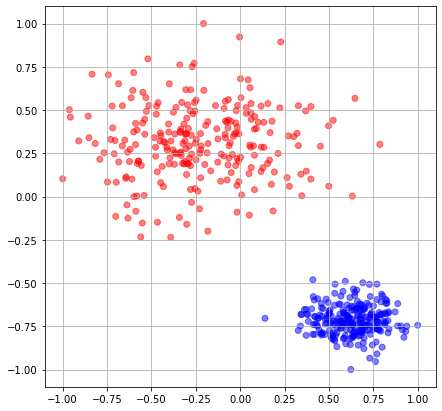

In [8]:
c = [ ['b','r'][int(j>0.5)] for j in y_train  ]
plt.figure(figsize=(7,7))
plt.scatter( x=X_train[:,0], y=X_train[:,1], c=c,  alpha=0.5 )
plt.grid()
plt.show()


---

In [9]:
# собираем полином
n_ex = X_train.shape[0] # количество примеров 
Xp = np.hstack( [ np.ones([n_ex,1]) , X_train ] )
n_par = Xp.shape[1] # количество параметров

Xp.shape

(500, 3)

In [10]:
def act(z): 
    return 1.0/(1.0 + np.exp(-z))

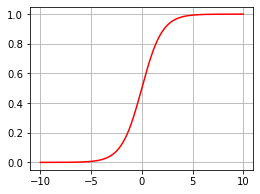

In [11]:
plt.figure(figsize=(4,3))
z=np.linspace(-10,10,500)
plt.plot( z,act(z),'-r' )
plt.grid()
plt.show()

In [12]:
# инициализация параметров
np.random.seed(get_seed())
T = np.random.normal(loc=0.0, scale=0.1, size=n_par)
T

array([-0.10431591, -0.08208557,  0.06651459])

In [13]:
# ф-ция потери - кросс-энтропия
def loss(o,y):
    o_restr = np.minimum(0.99999,np.maximum(1e-9,o))
    return -( y*np.log(o_restr) + (1-y)*np.log(1.0-o_restr) ).sum() / y.shape[0]    

In [14]:
# def CrossEntropy(o, y): return -log(o) if (y == 1)  else -log(1.0 - o)

In [15]:
# метод градиентного спуска

a=0.1 # скорость обучения

MAX_ITER = 500 # максимальное число циклов обучения
MIN_ERROR = 0.01 # порог минимальной ошибки

er_hist = [] # история ошибки

In [16]:
for i in range(MAX_ITER):
    
    O = act(Xp.dot(T)) # выход
    E = O - y_train # ошибка
    
    er_hist.append( loss(O,y_train) ) # значение ф-ции потери     
    
    if er_hist[-1] < MIN_ERROR: # проверяем достижение порога
        print(i,'min error ',er_hist[-1])
        break
    
    dE = Xp.T.dot(E)
    #dE /= np.linalg.norm(dE) # нормируем градиент
    
    T = T - a*dE
   

5 min error  0.0076293242197084735


In [17]:
print(T)
print(len(er_hist),er_hist[-1])

[ 4.2527822  -9.10129433 12.31292053]
6 0.0076293242197084735


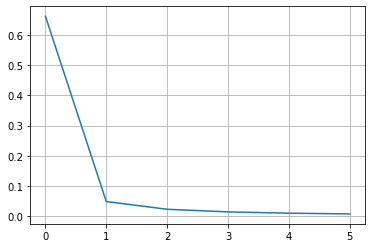

In [18]:
plt.plot(range(len(er_hist)),er_hist)
plt.grid()
plt.show()

---

In [19]:
score_bound=0.5
o = act(Xp.dot(T))

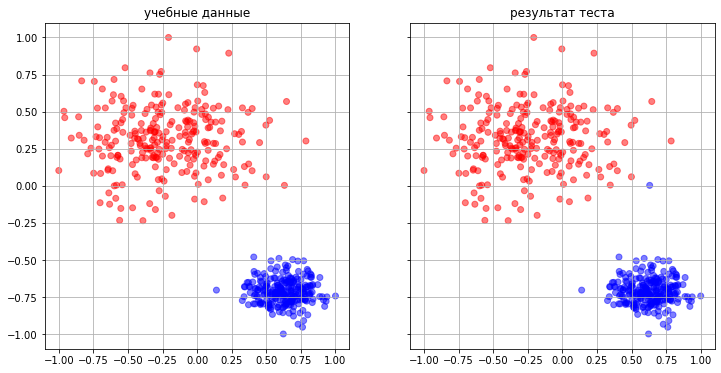

In [20]:
f, axarr = plt.subplots(1,2, sharex=True, sharey=True,figsize=(12,6),)
    
c = [ ['b','r'][int(j>0.5)] for j in y_train  ]
axarr[0].set_title('учебные данные')
axarr[0].scatter( x=X_train[:,0], y=X_train[:,1], c=c,  alpha=0.5 )
axarr[0].grid()

c = [ ['b','r'][int(j>score_bound)] for j in o  ]
axarr[1].set_title('результат теста')
axarr[1].scatter( x=X_train[:,0], y=X_train[:,1], c=c,  alpha=0.5 )
axarr[1].grid()

plt.show()
